## 1 . Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## 2. Loading the Data Set

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Train/test splitting and normalization

In [3]:
data_features = list(df.columns)
data_features.remove('diagnosis')
data_features.remove('id')
data_features
X = df[data_features]
y = df['diagnosis']

# Normalize the features array
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Transform the labels array into digital numbers
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

## 4.Accuracy report function


In [4]:
def accuracy_report(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  acc_report = {}
  labels = np.unique(y_test)
  AA = 0
  for label in labels:
    per_class_acc = cm[label,label]/np.sum(cm[label,:])*100
    acc_report["class "+str(label)] = per_class_acc
    AA+=per_class_acc
  AA = AA/len(labels)

  acc_report["OA"] = accuracy_score(y_test,y_pred)*100
  acc_report["AA"] = AA

  return acc_report

## 5. SVM Classification

## 5.1. SVM with RBF Kernel

#### a. Wide parameters search

In [5]:
# Define the hyperparameters to search over
parameters = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Perform the grid search
grid_search = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
best_score = grid_search.best_score_

# print the best parameters 
print("Best params C :", best_C)
print("Best Gamma", best_gamma)
print("Best CV score", "{:.4f}".format(best_score*100),"%")

Best params C : 10
Best Gamma 0.01
Best CV score 96.7310 %


#### b. Refined parameters search

In [6]:
# Define the hyperparameters to search over
parameters = {'C': [0.1, 1, 10, 100], 'gamma':np.arange(0.01, 0.03, 0.001),}

# Perform the grid search
grid_search = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
best_score = grid_search.best_score_

# print the best parameters 
print("Best params C :", best_C)
print("Best Gamma", best_gamma)
print("Best CV score", "{:.4f}".format(best_score*100),"%")

Best params C : 10
Best Gamma 0.013999999999999997
Best CV score 97.7436 %


## 7. Classification

In [10]:
# Train the SVM classifier
classifier = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
classifier.fit(X_train, y_train)

# Test the classifier
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", "{:.2f}".format(accuracy*100),"%")

Accuracy 99.42 %


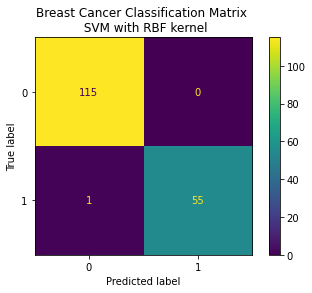

In [8]:
C =best_C
gamma = best_gamma

svm = SVC(kernel='rbf', C=C, gamma = gamma)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =svm.classes_)
disp.plot()
plt.title("Breast Cancer Classification Matrix \n SVM with RBF kernel")
plt.show()
